**About Book Crossing Dataset**<br>

This dataset has been compiled by Cai-Nicolas Ziegler in 2004, and it comprises of three tables for users, books and ratings. Explicit ratings are expressed on a scale from 1-10 (higher values denoting higher appreciation) and implicit rating is expressed by 0.

Reference: http://www2.informatik.uni-freiburg.de/~cziegler/BX/ 

**Objective**

This project entails building a Book Recommender System for users based on user-based and item-based collaborative filtering approaches.

#### Execute the below cell to load the datasets

In [1]:
import numpy as np
import pandas as pd
#Loading data
books = pd.read_csv("books.csv", sep=";", error_bad_lines=False, encoding="latin-1")
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']

users = pd.read_csv('users.csv', sep=';', error_bad_lines=False, encoding="latin-1")
users.columns = ['userID', 'Location', 'Age']

ratings = pd.read_csv('ratings.csv', sep=';', error_bad_lines=False, encoding="latin-1")
ratings.columns = ['userID', 'ISBN', 'bookRating']

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.p

In [2]:
#Making necesarry imports
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import numpy as np
from sklearn.neighbors import NearestNeighbors
from scipy.spatial.distance import correlation
from sklearn.metrics.pairwise import pairwise_distances
import ipywidgets as widgets
from IPython.display import display, clear_output
from contextlib import contextmanager
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import os, sys
import re
import seaborn as sns

### Check no.of records and features given in each dataset

In [3]:
print (books.shape)
print(users.shape)
print(ratings.shape)

(271360, 8)
(278858, 3)
(1149780, 3)


In [4]:
for col in books.columns:
    print(col)

ISBN
bookTitle
bookAuthor
yearOfPublication
publisher
imageUrlS
imageUrlM
imageUrlL


In [5]:
for col in users.columns:
    print(col)

userID
Location
Age


In [6]:
for col in ratings.columns:
    print(col)

userID
ISBN
bookRating


## Exploring books dataset

In [7]:
books.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


### Drop last three columns containing image URLs which will not be required for analysis

In [8]:
books.drop(['imageUrlS', 'imageUrlM', 'imageUrlL'],axis=1,inplace=True)

In [9]:
books.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [10]:
books.dtypes

ISBN                 object
bookTitle            object
bookAuthor           object
yearOfPublication    object
publisher            object
dtype: object

**yearOfPublication**

### Check unique values of yearOfPublication


In [11]:
books.yearOfPublication.unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

As it can be seen from above that there are some incorrect entries in this field. It looks like Publisher names 'DK Publishing Inc' and 'Gallimard' have been incorrectly loaded as yearOfPublication in dataset due to some errors in csv file.


Also some of the entries are strings and same years have been entered as numbers in some places. We will try to fix these things in the coming questions.

### Check the rows having 'DK Publishing Inc' as yearOfPublication

In [12]:
books.loc[books.yearOfPublication == 'DK Publishing Inc',:]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...


### Drop the rows having `'DK Publishing Inc'` and `'Gallimard'` as `yearOfPublication`

In [13]:
books.loc[books.yearOfPublication == 'Gallimard',:]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...


In [14]:
books.drop(books[books['yearOfPublication'] == 'DK Publishing Inc'].index, inplace = True)

In [15]:
books.drop(books[books['yearOfPublication'] == 'Gallimard'].index, inplace = True)

In [16]:
books.yearOfPublication.unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

### Change the datatype of yearOfPublication to 'int'

In [17]:
books.yearOfPublication = books.yearOfPublication.astype(np.int64)

In [18]:
books.dtypes

ISBN                 object
bookTitle            object
bookAuthor           object
yearOfPublication     int64
publisher            object
dtype: object

### Drop NaNs in `'publisher'` column


In [19]:
books[books.isnull().any(axis=1)]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing


In [20]:
books = books.dropna(subset=['publisher'])

## Exploring Users dataset

In [21]:
print(users.shape)
users.head()

(278858, 3)


,userID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [22]:
users.dtypes

userID        int64
Location     object
Age         float64
dtype: object

### Get all unique values in ascending order for column `Age`

In [23]:
print(sorted(users['Age'].unique()))

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0

Age column has some invalid entries like nan, 0 and very high values like 100 and above

### Values below 5 and above 90 do not make much sense for our book rating case...hence replace these by NaNs

In [24]:
users.loc[(users.Age > 90) | (users.Age < 5), 'Age'] = np.NaN

In [25]:
print(sorted(users.Age.unique()))

[nan, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0]


### Replace null values in column `Age` with mean

In [26]:
users.Age = users.Age.fillna(users.Age.mean())

In [27]:
print(sorted(users.Age.unique()))

[5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 34.72384041634689, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0]


### Change the datatype of `Age` to `int`

In [28]:
users.Age = users.Age.astype(np.int64)

## Exploring the Ratings Dataset

### check the shape

In [29]:
ratings.shape

(1149780, 3)

In [30]:
n_users = users.shape[0]
n_books = books.shape[0]

In [31]:
ratings.head(5)

,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


### Ratings dataset should have books only which exist in our books dataset. Drop the remaining rows

In [32]:
ratings_new = ratings[ratings.ISBN.isin(books.ISBN)]

### Ratings dataset should have ratings from users which exist in users dataset. Drop the remaining rows

In [33]:
ratings_new = ratings_new[ratings_new.userID.isin(users.userID)]

In [34]:
print(ratings.shape)
print(ratings_new.shape)

(1149780, 3)
(1031130, 3)


### Consider only ratings from 1-10 and leave 0s in column `bookRating`

In [35]:
ratings.bookRating.unique()

array([ 0,  5,  3,  6,  8,  7, 10,  9,  4,  1,  2], dtype=int64)

In [36]:
ratings_df = ratings[(ratings.bookRating >= 1) & (ratings.bookRating <= 10)]

In [37]:
ratings_df.shape

(433671, 3)

### Find out which rating has been given highest number of times

In [38]:
ratings_df['bookRating'].value_counts()

8     103736
10     78610
7      76457
9      67541
5      50974
6      36924
4       8904
3       5996
2       2759
1       1770
Name: bookRating, dtype: int64

In [39]:
##rating 8 has been given highest number of times which cab seen by below plot as well

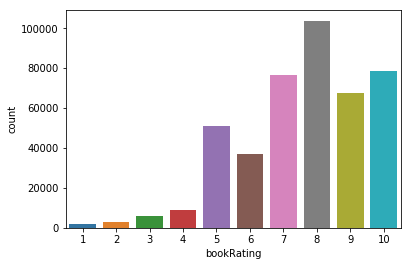

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.countplot(data=ratings_df, x='bookRating')
plt.show()

### **Collaborative Filtering Based Recommendation Systems**

### For more accurate results only consider users who have rated atleast 100 books

In [41]:
#ratings_df['userID'].value_counts()
counts1 = ratings_df['userID'].value_counts()
ratings_df = ratings_df[ratings_df['userID'].isin(counts1[counts1 >=100].index)]

In [42]:
#ratings_df1 = ratings_df[ratings_df['userID'] > 100]

In [44]:
ratings_df.dtypes

userID         int64
ISBN          object
bookRating     int64
dtype: object

### Generating ratings matrix from explicit ratings


#### Note: since NaNs cannot be handled by training algorithms, replace these by 0, which indicates absence of ratings

In [62]:
ratings_matrix = ratings_df.pivot(index='userID', columns='ISBN', values='bookRating').fillna(0)
userID = ratings_matrix.index
ISBN = ratings_matrix.columns

In [63]:
print(ratings_matrix.shape)
ratings_matrix.tail()

(495, 78487)


ISBN,0375404120,9022906116,0*708880258,0.330241664,0000000000,00000000000,0000000000000,0000000029841,0000000051,0000018030,...,O67174142X,O9088446X,Q380708353,SBN67001026X,UNGRANDHOMMED,X000000000,ZR903CX0003,"\0432534220\""""","\2842053052\""""",Ô½crosoft
userID,,,,,,,,,,,,,,,,,,,,,
274061,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
274301,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
275970,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
277427,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278418,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
#n_users = ratings_matrix.shape[0] #considering only those users who gave explicit ratings
#n_books = ratings_matrix.shape[1]
#print (n_users, n_books)

In [65]:
#ratings_matrix.fillna(0, inplace = True)
#ratings_matrix = ratings_matrix.astype(np.int64)

In [66]:
#ratings_matrix.head(5)

### Generate the predicted ratings using SVD with no.of singular values to be 50

In [67]:
from scipy.sparse.linalg import svds
U, sigma, Vt = svds(ratings_matrix, k = 50)

In [68]:
sigma

array([152.26201212, 153.62983913, 154.512652  , 157.47895228,
       158.40578991, 158.98364988, 160.67017523, 160.94208875,
       161.24233528, 162.37168724, 163.50577305, 164.13563131,
       166.64033417, 167.94174752, 170.46912293, 171.27443008,
       172.89953279, 174.62701285, 175.82100464, 176.61748025,
       178.79977166, 181.88825065, 183.00505634, 183.22566017,
       185.0081835 , 188.85040851, 191.79970751, 192.86775162,
       196.62788102, 202.41102188, 204.407026  , 205.64211815,
       207.45500807, 209.45777971, 213.72172787, 218.78908097,
       221.26060059, 224.91395413, 238.6203147 , 240.56789766,
       251.00469555, 253.51042042, 267.16041942, 267.80147562,
       286.75623785, 293.94126549, 297.7335917 , 391.46660507,
       674.15806585, 708.9715843 ])

In [69]:
sigma = np.diag(sigma)
sigma

array([[152.26201212,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        , 153.62983913,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        , 154.512652  , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ..., 391.46660507,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
        674.15806585,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        , 708.9715843 ]])

In [71]:
all_users_predicted_ratings = np.dot(np.dot(U, sigma), Vt)

In [72]:
preds_df = pd.DataFrame(all_users_predicted_ratings, columns = ratings_matrix.columns)

In [73]:
preds_df

ISBN,0375404120,9022906116,0*708880258,0.330241664,0000000000,00000000000,0000000000000,0000000029841,0000000051,0000018030,...,O67174142X,O9088446X,Q380708353,SBN67001026X,UNGRANDHOMMED,X000000000,ZR903CX0003,"\0432534220\""""","\2842053052\""""",Ô½crosoft
0,2.571957e-04,-0.009825,-0.000331,0.036243,-0.012632,-0.011229,0.001827,0.006273,0.004211,0.004392,...,0.056523,-0.011229,0.002159,0.006900,0.000173,-0.014036,-0.001404,-0.008422,-0.009825,0.001075
1,5.665083e-05,0.000457,0.000853,-0.005987,0.000588,0.000523,0.000052,0.001139,0.000404,0.002004,...,0.018512,0.000523,0.000090,0.002887,0.000011,0.000653,0.000065,0.000392,0.000457,-0.000038
2,5.237705e-05,0.003483,0.003033,0.029764,0.004479,0.003981,0.000563,0.001191,0.012415,0.007998,...,0.044935,0.003981,0.000232,0.005490,0.000214,0.004976,0.000498,0.002986,0.003483,0.007754
3,-2.304023e-05,-0.000173,-0.000265,-0.000780,-0.000223,-0.000198,-0.000106,0.002102,-0.000104,-0.000055,...,-0.002966,-0.000198,0.000088,-0.000628,0.000687,-0.000247,-0.000025,-0.000148,-0.000173,0.000120
4,1.274517e-03,-0.005365,0.002881,0.076353,-0.006898,-0.006132,0.001901,0.011483,0.013445,0.011508,...,0.307472,-0.006132,0.007165,0.046193,0.000671,-0.007665,-0.000766,-0.004599,-0.005365,0.014067
5,-3.546438e-05,0.006084,-0.003670,0.045489,0.007823,0.006954,0.000406,0.000615,0.007285,0.001322,...,-0.037258,0.006954,-0.000172,0.000279,0.000161,0.008692,0.000869,0.005215,0.006084,0.008147
6,2.507581e-04,-0.007091,0.000091,0.023635,-0.009117,-0.008104,0.000459,0.009408,0.004182,0.013972,...,0.075093,-0.008104,0.001747,0.010373,0.000157,-0.010130,-0.001013,-0.006078,-0.007091,0.003542
7,6.530470e-04,0.012069,0.000113,0.049466,0.015517,0.013793,0.001686,0.007156,0.005586,0.004550,...,0.156613,0.013793,0.004830,0.023432,0.000375,0.017241,0.001724,0.010345,0.012069,0.006502
8,1.014444e-03,-0.000896,0.005039,0.063169,-0.001152,-0.001024,0.004665,0.012285,0.006435,0.012868,...,0.289153,-0.001024,0.007757,0.032097,0.000443,-0.001280,-0.000128,-0.000768,-0.000896,0.008888
9,4.825817e-04,0.006221,0.004108,0.024459,0.007998,0.007109,0.001526,0.007894,0.009998,0.007855,...,0.172191,0.007109,0.003851,0.021939,0.000267,0.008887,0.000889,0.005332,0.006221,0.007372


### Take a particular user_id

### Lets find the recommendations for user with id `2110`

#### Note: Execute the below cells to get the variables loaded

In [74]:
userID = 2110

In [75]:
user_id = 2 #2nd row in ratings matrix and predicted matrix

### Get the predicted ratings for userID `2110` and sort them in descending order

In [77]:
already_rated, predictions, sorted_user_predictions, user_data, user_full = recommend_movies(preds_df, 2, movies, ratings, 10)

NameError: name 'movies' is not defined

In [53]:
#This function predicts rating for specified user-item combination based on user-based approach
def predict_userbased(user_id, item_id, ratings, metric = metric, k=k):
    prediction=0
    user_loc = ratings.index.get_loc(user_id)
    item_loc = ratings.columns.get_loc(item_id)
    similarities, indices=findksimilarusers(user_id, ratings,metric, k) #similar users based on cosine similarity
    mean_rating = ratings.iloc[user_loc,:].mean() #to adjust for zero based indexing
    sum_wt = np.sum(similarities)-1
    product=1
    wtd_sum = 0 
    
    for i in range(0, len(indices.flatten())):
        if indices.flatten()[i] == user_loc:
            continue;
        else: 
            ratings_diff = ratings.iloc[indices.flatten()[i],item_loc]-np.mean(ratings.iloc[indices.flatten()[i],:])
            product = ratings_diff * (similarities[i])
            wtd_sum = wtd_sum + product
    
    #in case of very sparse datasets, using correlation metric for collaborative based approach may give negative ratings
    #which are handled here as below
    if prediction <= 0:
        prediction = 1   
    elif prediction >10:
        prediction = 10
    
    prediction = int(round(mean_rating + (wtd_sum/sum_wt)))
    #print '\nPredicted rating for user {0} -> item {1}: {2}'.format(user_id,item_id,prediction)

    return prediction

In [56]:
predict_userbased(2110,'0001056107',ratings_matrix);

### Create a dataframe with name `user_data` containing userID `2110` explicitly interacted books

In [ ]:
user_data.head()

In [ ]:
user_data.shape

### Combine the user_data and and corresponding book data(`book_data`) in a single dataframe with name `user_full_info`

In [ ]:
book_data.shape

In [ ]:
book_data.head()

In [ ]:
user_full_info.head()

### Get top 10 recommendations for above given userID from the books not already rated by that user